In [15]:
# Importing the required libraries.
import os
import pickle, zlib
from gensim.models.doc2vec import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [28]:
# For obtaining the similarity matrices for all the subclasses, for all the collections.

datasets = ['dataset_agriculture', 'dataset_development', 'dataset_environment', 'dataset_industrialization', 'dataset_lifestyle']
models = ['model_agriculture', 'model_development', 'model_environment', 'model_industrialization', 'model_lifestyle']

for dataset, model in zip(datasets,models):

    # Printing the collection name.
    collection_name = dataset[8:]
    print('\nCollection:',collection_name.capitalize())

    # Loading the dataset and the model from the drive.
    file = open('./DT2V_Datasets/'+dataset, 'rb')
    dataset = pickle.loads(zlib.decompress(pickle.load(file)))
    file.close()
    model = Doc2Vec.load('./Models/'+model)

    # Collecting the article_ids, and corresponding article_vectors for each class.
    temp_ids = [set() for _ in range(9)]
    temp_vectors = [[] for _ in range(9)]
    temp_datasets = [[] for _ in range(9)]
    for i in dataset:
        if i[6]=='Unemp' and i[7]=='Slow':
            if i[0] not in temp_ids[0]:
                temp_ids[0].add(i[0])
                temp_vectors[0].append(model.docvecs[i[0]])
        if i[6]=='Unemp' and i[7]=='Average':
            if i[0] not in temp_ids[1]:
                temp_ids[1].add(i[0])
                temp_vectors[1].append(model.docvecs[i[0]])
        if i[6]=='Unemp' and i[7]=='Fast':
            if i[0] not in temp_ids[2]:
                temp_ids[2].add(i[0])
                temp_vectors[2].append(model.docvecs[i[0]])
        if i[6]=='Agri' and i[7]=='Slow':
            if i[0] not in temp_ids[3]:
                temp_ids[3].add(i[0])
                temp_vectors[3].append(model.docvecs[i[0]])
        if i[6]=='Agri' and i[7]=='Average':
            if i[0] not in temp_ids[4]:
                temp_ids[4].add(i[0])
                temp_vectors[4].append(model.docvecs[i[0]])
        if i[6]=='Agri' and i[7]=='Fast':
            if i[0] not in temp_ids[5]:
                temp_ids[5].add(i[0])
                temp_vectors[5].append(model.docvecs[i[0]])
        if i[6]=='Non Agri' and i[7]=='Slow':
            if i[0] not in temp_ids[6]:
                temp_ids[6].add(i[0])
                temp_vectors[6].append(model.docvecs[i[0]])
        if i[6]=='Non Agri' and i[7]=='Average':
            if i[0] not in temp_ids[7]:
                temp_ids[7].add(i[0])
                temp_vectors[7].append(model.docvecs[i[0]])
        if i[6]=='Non Agri' and i[7]=='Fast':
            if i[0] not in temp_ids[8]:
                temp_ids[8].add(i[0])
                temp_vectors[8].append(model.docvecs[i[0]])

    # Finding the top titles and keywords for each class.
    for i in range(9):
        temp_vectors[i] = np.median(temp_vectors[i],axis=0)
    similarity_matrix = np.zeros((9,9))
    for i in range(9):
        for j in range(9):
            similarity_matrix[i][j] = cosine_similarity([temp_vectors[i],temp_vectors[j]])[0][1]
    similarity_matrix = np.round(similarity_matrix,2)
    file = open('./Results/'+str(collection_name)+'_similarity_martix.csv','w')
    for i in similarity_matrix:
        temp = ''
        for j in i:
            temp += (str(j)+',')
        file.write(temp[:-1]+'\n')
    file.close()
        


Collection: Agriculture

Collection: Development

Collection: Environment

Collection: Industrialization

Collection: Lifestyle


In [11]:
# Collection : Common Keywords accros all the subclasses.

_,_,files = next(os.walk('./Results/Keywords/'))
for collection in ['agriculture','development','environment','industrialization','lifestyle']:
    temp_files = []
    for i in files:
        if i[:len(collection)]==collection:
            temp_files.append(i)
    for i in range(len(temp_files)):
        file = open('./Results/Keywords/'+temp_files[i])
        data = set(file.read().split('\n'))
        file.close()
        temp = data if i==0 else temp&data
    print(collection[:11].capitalize(),':\t', list(temp)[1:])

Agriculture :	 ['farmer', 'land', 'rain', 'agricultur', 'crop', 'rainfal', 'water', 'monsoon', 'villag', 'area']
Development :	 ['programm', 'scheme', 'centr', 'develop', 'project']
Environment :	 ['area']
Industriali :	 ['power', 'develop', 'project']
Lifestyle :	 ['polic', 'hospit', 'health']


In [9]:
# Subclasses : Uniquely occuring Keywords.

_,_,files = next(os.walk('./Results/Keywords/'))
subclass = ['unemp_slow','unemp_avg','unemp_fast','agri_slow','agri_avg','agri_fast','non_agri_slow','non_agri_avg','non_agri_fast']
temp = {}
for i in range(len(subclass)):
    temp[i] = subclass[i]
subclass = temp

for collection in ['agriculture','development','environment','industrialization','lifestyle']:
    print('\n'+collection.capitalize())
    temp_files = []
    for i in files:
        if i[:len(collection)]==collection:
            temp_files.append(i)
    for i in range(len(temp_files)):
        file = open('./Results/Keywords/'+temp_files[i])
        data1 = set(file.read().split('\n'))
        file.close()
        data2 = set()
        for j in range(len(temp_files)):
            if i==j:
                continue
            file = open('./Results/Keywords/'+temp_files[j])
            data2 = data2|set(file.read().split('\n'))
            file.close()
        print('\n'+subclass[i]+' : ')
        print(data1-data2)
        


Agriculture

unemp_slow : 
{'rl', 'sugar', 'told', 'meter', 'factori', 'capac', 'rabi', 'ncp', 'jayakwadi', 'chouhan', 'patil', 'sugarcan', 'major', 'full'}

unemp_avg : 
{'orang', 'soyabean', 'deficit', 'show', 'fund', 'cooper', 'conserv', 'ha', 'money', 'soil', 'tehsil', 'tigress', 'assess'}

unemp_fast : 
{'tmcft', 'reservoir', 'low', 'anoth', 'tenant', 'tank', 'remain', 'owe', 'canal', 'procur', 'deputi', 'submit', 'templ', 'cattl', 'naidu', 'inspect', 'engin', 'kharif', 'tonn', 'target', 'banker', 'vaigai'}

agri_slow : 
{'wine', 'grape', 'pre', 'system', 'varieti', 'pond', 'wineri', 'banana', 'number', 'across', 'plantat', 'strike', 'clean', 'stock', 'quintal', 'cover', 'imd'}

agri_avg : 
{'commut', 'manag', 'traffic', 'electr', 'arav', 'ncr', 'base', 'flu', 'pollut', 'road', 'oper', 'bird', 'morn', 'august', 'occur', 'women', 'agenc', 'acquisit', 'interest', 'maximum', 'site', 'thundershow', 'privat', 'khemka', 'citi', 'activ', 'mcg', 'tr', 'consolid'}

agri_fast : 
{'term', '

In [2]:
# Patterns : Common Keywords.

_,_,files = next(os.walk('./Results/Keywords/'))
subclass = ['unemp_slow','unemp_avg','unemp_fast','agri_slow','agri_avg','agri_fast','non_agri_slow','non_agri_avg','non_agri_fast']
temp = {}
for i in range(len(subclass)):
    temp[i] = subclass[i]
subclass = temp

for collection in ['agriculture','development','environment','industrialization','lifestyle']:
    print('\n'+collection.capitalize())
    temp_files = []
    for i in files:
        if i[:len(collection)]==collection:
            temp_files.append(i)
    for i in range(len(temp_files)):
        for j in range(len(temp_files)):
            if i==j:
                continue
            file1 = open('./Results/Keywords/'+temp_files[i])
            file2 = open('./Results/Keywords/'+temp_files[j])
            data1 = set(file1.read().split('\n'))
            data2 = set(file2.read().split('\n'))
            file1.close()
            file2.close()
            print('\n'+subclass[i]+' '+subclass[j]+' : ')
            print(data1&data2)
        


Agriculture

unemp_slow unemp_avg : 
{'', 'loan', 'spell', 'rainfal', 'suppli', 'kill', 'face', 'week', 'scheme', 'suicid', 'well', 'agricultur', 'compens', 'situat', 'receiv', 'irrig', 'less', 'good', 'averag', 'dam', 'howev', 'rain', 'farmer', 'hectar', 'commit', 'relief', 'monsoon', 'land', 'crop', 'hit', 'season', 'heavi', 'debt', 'sow', 'cultiv', 'area', 'june', 'taluka', 'cent', 'polic', 'project', 'may', 'farm', 'water', 'damag', 'till', 'drought', 'total', 'record', 'mm', 'bank', 'loss', 'storag', 'part', 'due', 'villag', 'divis', 'affect', 'demand'}

unemp_slow unemp_fast : 
{'', 'loan', 'rainfal', 'suppli', 'suicid', 'well', 'agricultur', 'compens', 'situat', 'receiv', 'dri', 'irrig', 'drink', 'fodder', 'good', 'even', 'dam', 'rain', 'farmer', 'hectar', 'commit', 'relief', 'around', 'protest', 'monsoon', 'land', 'crop', 'hit', 'season', 'heavi', 'price', 'sow', 'collector', 'cultiv', 'leader', 'june', 'area', 'centr', 'life', 'cent', 'team', 'polic', 'project', 'farm', 'wate


non_agri_slow unemp_slow : 
{'', 'use', 'worker', 'could', 'person', 'scheme', 'presid', 'construct', 'given', 'farmer', 'job', 'panchayat', 'cost', 'employ', 'child', 'area', 'mgnreg', 'centr', 'account', 'hous', 'polic', 'project', 'number', 'implement', 'water', 'wage', 'set', 'progress', 'part', 'propos', 'programm', 'villag', 'demand', 'develop'}

non_agri_slow unemp_avg : 
{'', 'use', 'anoth', 'worker', 'could', 'scheme', 'construct', 'connect', 'india', 'fund', 'farmer', 'elect', 'modi', 'cost', 'employ', 'initi', 'road', 'area', 'come', 'prime', 'centr', 'polic', 'project', 'number', 'implement', 'water', 'set', 'make', 'thursday', 'like', 'citi', 'propos', 'programm', 'villag', 'demand', 'infrastructur', 'develop'}

non_agri_slow unemp_fast : 
{'', 'worker', 'scheme', 'construct', 'connect', 'given', 'fund', 'farmer', 'job', 'elect', 'panchayat', 'employ', 'road', 'area', 'mgnreg', 'women', 'centr', 'action', 'team', 'hous', 'polic', 'project', 'number', 'implement', 'water',


agri_avg agri_fast : 
{'', 'gener', 'manag', 'power', 'mani', 'estat', 'real', 'call', 'market', 'busi', 'trai', 'base', 'india', 'fund', 'servic', 'high', 'compani', 'court', 'telecom', 'price', 'oper', 'come', 'invest', 'countri', 'cent', 'open', 'firm', 'hous', 'project', 'number', 'qualiti', 'industri', 'make', 'build', 'like', 'propos', 'increas', 'sector', 'develop'}

agri_avg non_agri_slow : 
{'', 'illeg', 'gener', 'manag', 'power', 'even', 'india', 'high', 'land', 'compani', 'court', 'oper', 'area', 'come', 'forest', 'corpor', 'open', 'mine', 'hous', 'polic', 'project', 'number', 'industri', 'set', 'like', 'unit', 'citi', 'villag', 'demand', 'develop'}

agri_avg non_agri_avg : 
{'', 'illeg', 'gener', 'manag', 'power', 'scheme', 'mani', 'estat', 'construct', 'call', 'even', 'india', 'servic', 'around', 'land', 'sector', 'area', 'come', 'invest', 'countri', 'cent', 'open', 'mine', 'hous', 'polic', 'project', 'industri', 'set', 'make', 'engin', 'like', 'villag', 'demand', 'infras

In [10]:
# Patterns: Keywords unique for each subclass.

_,_,files = next(os.walk('./Results/Keywords/'))
subclass = ['unemp_slow','unemp_avg','unemp_fast','agri_slow','agri_avg','agri_fast','non_agri_slow','non_agri_avg','non_agri_fast']
temp = {}
for i in range(len(subclass)):
    temp[i] = subclass[i]
subclass = temp

for collection in ['agriculture','development','environment','industrialization','lifestyle']:
    print('\n'+collection.capitalize())
    temp_files = []
    for i in files:
        if i[:len(collection)]==collection:
            temp_files.append(i)
    for i in range(len(temp_files)):
        for j in range(len(temp_files)):
            if i==j:
                continue
            file1 = open('./Results/Keywords/'+temp_files[i])
            file2 = open('./Results/Keywords/'+temp_files[j])
            data1 = set(file1.read().split('\n'))
            data2 = set(file2.read().split('\n'))
            file1.close()
            file2.close()
            print('\n'+subclass[i]+' '+subclass[j]+' : ')
            print(data1-data2)
            print(data2-data1)
        


Agriculture

unemp_slow unemp_avg : 
{'sugar', 'told', 'meter', 'rabi', 'jayakwadi', 'dri', 'sugarcan', 'drink', 'fodder', 'major', 'insur', 'even', 'rl', 'full', 'given', 'shower', 'around', 'protest', 'waiver', 'continu', 'factori', 'capac', 'sinc', 'patil', 'announc', 'price', 'collector', 'administr', 'leader', 'centr', 'team', 'hous', 'tanker', 'acr', 'amount', 'follow', 'committe', 'reach', 'ncp', 'end', 'life', 'chouhan'}
{'use', 'deficit', 'show', 'field', 'sanction', 'could', 'power', 'river', 'mani', 'caus', 'juli', 'consum', 'orang', 'avail', 'india', 'fund', 'high', 'money', 'hailstorm', 'flood', 'tigress', 'forest', 'horticultur', 'conserv', 'groundwat', 'cotton', 'tiger', 'soil', 'rise', 'assess', 'rais', 'claim', 'fadnavi', 'soyabean', 'like', 'cooper', 'ha', 'sever', 'increas', 'plant', 'tehsil', 'develop'}

unemp_slow unemp_fast : 
{'spell', 'kill', 'face', 'week', 'sugar', 'scheme', 'told', 'meter', 'rabi', 'jayakwadi', 'less', 'sugarcan', 'major', 'insur', 'full', '

non_agri_slow agri_fast : 
{'cross', 'fire', 'kill', 'death', 'fish', 'rhino', 'die', 'nest', 'arrest', 'peacock', 'forest', 'shot', 'pakistani', 'polic', 'rang', 'guard', 'eleph', 'zoo', 'villag', 'incid', 'affect', 'girl', 'situat', 'milit', 'calipe', 'rain', 'recov', 'along', 'clean', 'flood', 'bird', 'present', 'attack', 'kaziranga', 'protect', 'repair', 'spot', 'made', 'tiger', 'identifi', 'sand', 'forc', 'lion', 'northeast', 'colleg', 'front', 'leopard', 'shell', 'inform', 'poacher', 'wild', 'oper', 'turtl', 'ndfb', 'team', 'hous', 'carcass', 'tourism', 'park', 'unit', 'free', 'march', 'brief', 'anim', 'ganga', 'herd', 'drive', 'around', 'train', 'secur', 'rescu', 'border', 'wildlif', 'today', 'armi', 'water', 'dead', 'troop', 'thursday', 'due'}
{'air', 'could', 'well', 'electr', 'congest', 'impact', 'public', 'land', 'metro', 'oil', 'ngt', 'children', 'us', 'invest', 'go', 'environ', 'qualiti', 'board', 'ban', 'file', 'educ', 'system', 'consult', 'problem', 'bmc', 'power', 'traf

In [54]:
# Analysis using tag vectors for all the districts.

datasets = ['dataset_agriculture', 'dataset_development', 'dataset_environment', 'dataset_industrialization', 'dataset_lifestyle']
models = ['model_agriculture', 'model_development', 'model_environment', 'model_industrialization', 'model_lifestyle']

district_sets = []
articles_count = np.zeros((640,5))
district_tags = np.zeros((640,5,50))

for i, (dataset, model) in enumerate(zip(datasets,models)):

    # Printing the collection name.
    collection_name = dataset[8:]
    print('Collection:',collection_name.capitalize())

    # Loading the dataset and the model from the drive.
    file = open('./DT2V_Datasets/'+dataset, 'rb')
    dataset = pickle.loads(zlib.decompress(pickle.load(file)))
    file.close()
    model = Doc2Vec.load('./Models/'+model)
    
    temp = set()
    for article in dataset:
        district_id = article[5]-1
        temp.add(district_id)
        articles_count[district_id][i]+=1
        
    for district_id in temp:
        district_tags[district_id,i,:] = model.docvecs[district_id]
    district_sets.append(temp)
    
district_ids = district_sets[0]&district_sets[1]&district_sets[2]&district_sets[3]&district_sets[4]
temp = {}
for i in district_ids:
    temp[i+1] = district_tags[i,:,:].reshape(50*5,)
district_tags = temp

Collection: Agriculture
Collection: Development
Collection: Environment
Collection: Industrialization
Collection: Lifestyle


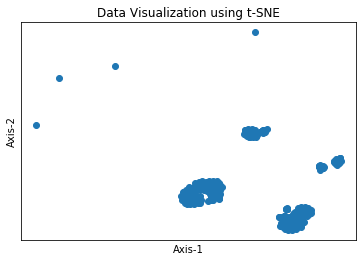

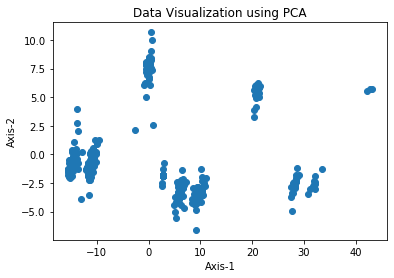

In [103]:
# Applying t-SNE on the district tags.

district_tags_tsne = TSNE(n_components=2).fit_transform(np.array(list(district_tags.values())))

plt.scatter(district_tags_tsne.T[0],district_tags_tsne.T[1])
plt.xlabel('Axis-1') 
plt.ylabel('Axis-2') 
plt.title('Data Visualization using t-SNE') 
plt.xticks([])
plt.yticks([])
plt.show()

district_tags_pca = PCA(n_components=2).fit_transform(np.array(list(district_tags.values())))

plt.scatter(district_tags_pca.T[0],district_tags_pca.T[1])
plt.xlabel('Axis-1') 
plt.ylabel('Axis-2') 
plt.title('Data Visualization using PCA') 
plt.show()

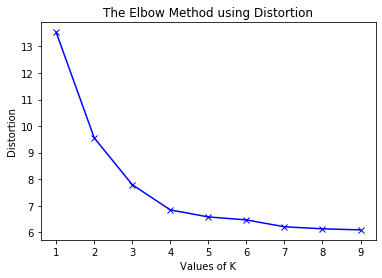

In [70]:
# K-Means Clustering - Elbow curve.

X = np.array(list(district_tags.values()))

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X)  
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [127]:
# Clustering using k=4.

labels = KMeans(n_clusters=4).fit(X).labels_

temp = {}
for i,j in sorted(list(zip(labels,list(district_tags.keys())))):
    if i not in temp:
        temp[i] = [j]
    else:
        temp[i].append(j)
clusters = temp

for i in range(4):
    print('Cluster-'+str(i+1),':',len(clusters[i]))

Cluster-1 : 216
Cluster-2 : 176
Cluster-3 : 82
Cluster-4 : 62


In [123]:
# Print district names for all the clusters.

file = open('district_names.csv')
district_names = file.read().split('\n')[1:-1]
file.close()

temp = {}
for i in district_names:
    i = i.split(',')
    temp[int(i[0])] = i[1]
    
district_names = temp 

for i in clusters[0]:
    print(district_names[i])
print()
for i in clusters[1]:
    print(district_names[i])
print()
for i in clusters[2]:
    print(district_names[i])
print()
for i in clusters[3]:
    print(district_names[i])

Nawanshahr 
Moga
Faridkot
Sonipat
Hisar
Gurgaon
Jodhpur
Jaisalmer
Barmer
Tonk
Hathras 
Firozabad
Budaun
Pilibhit
Unnao
Fatehpur
Varanasi
Saharsa
Banka
Munger
Bhojpur
West Kameng
Upper Subansiri
Champhai
Goalpara
Sibsagar
Uttar Dinajpur
Dakshin Dinajpur
Birbhum
Bankura 
Pakaur
Palamu
Sambalpur
Dhenkanal
Puri
Ganjam
Panna
Sagar
Rewa
Umaria
Neemuch
Surendranagar
Nagpur
Chandrapur
Hingoli
Thane
Mumbai
Pune
Ahmadnagar
Chikmagalur
Lakshadweep
Alappuzha
Pathanamthitta
Kollam
Thiruvananthapuram
Tiruvannamalai
Namakkal
Dindigul
Perambalur
Cuddalore
Nagapattinam
Dharmapuri

Punch
Lahul & Spiti
Kapurthala
Jalandhar
Hoshiarpur
Fatehgarh Sahib
Ludhiana
Amritsar
Uttarkashi
Garhwal
Panchkula
Ambala
Yamunanagar
Kurukshetra
Jhajjar
East
New Delhi
Central
South West
Ganganagar
Sikar
Baran
Baghpat
Gautam Buddha Nagar
Bulandshahar 
Rae Bareli
Jalaun 
Tawang
Imphal East
Ukhrul
South Tripura 
Dibrugarh
Jorhat
Golaghat
Karimganj
Jalpaiguri 
Koch Bihar 
Hugli 
Kolkata
South  Twenty Four Parganas
Medinipur 
Bo